# Image classifier with keras and CNN
## Fashion MNIST dataset

Total 70,000 images


| Label | Description |
| --- | --- |
| 0 | T-Shirt/Top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [2]:
#import Fashion MNIST dataset

from keras.datasets import fashion_mnist
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
import matplotlib.pyplot as plt

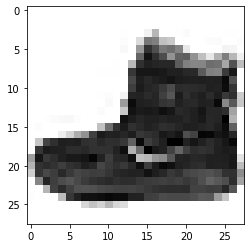

In [16]:
plt.imshow(x_train[0],cmap='gray_r')

In [17]:
y_train[0]

9

In [21]:
#normalize the x_train and x_test data between the range 0-1

x_train = x_train/ x_train.max()
x_test = x_test/ x_test.max()

In [27]:
x_train[0].shape

(28, 28)

In [46]:
len(x_train)

60000

In [44]:
len(y_cat_train)

60000

In [29]:
#reshape the X arrays to include a 4 dimension of single channel.

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [48]:
(x_train.shape)

(60000, 28, 28, 1)

In [31]:
from keras.utils import to_categorical

In [32]:
#Convert y_train and y_test values to one hot encoder for categorical analysis

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [33]:
y_cat_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [37]:
#Model build

model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4), 
                 input_shape = (28,28,1),
                 activation = 'relu'
                ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [49]:
# Training / fitting the model with training set, epoch number is random

model.fit(x_train, y_cat_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1214 - accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1121 - accuracy: 0.9612
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1065 - accuracy: 0.9636
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0997 - accuracy: 0.9657
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0960 - accuracy: 0.9675
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0872 - accuracy: 0.9704
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0844 - accuracy: 0.9712
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0793 - accuracy: 0.9727
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0752 - accuracy: 0.9743
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [50]:
#evaluate model with test set

model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5483 - accuracy: 0.9077


[0.5483487248420715, 0.9077000021934509]

In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
from sklearn.metrics import classification_report

In [54]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.87      0.86      1000
           3       0.92      0.89      0.91      1000
           4       0.80      0.91      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

